# Data Exploration: World traffic accidents

Individual project completed by Ben Beattie

---
In this Project, Data exploration has been undertaken of the Global Traffic Accidents Dataset provided by Adil Shamim. The dataset cam be accessed here: https://www.kaggle.com/datasets/adilshamim8/global-traffic-accidents-dataset?resource=download. This data set involves a number of different features, all relating to real world accidents which have occured. Through the exploration of this data, we will identify trends and key insights into traffic accidents and attempt to understand underlying factors influencing accidents. The dataset contains the following features. Accident ID, which is a unique identifier for each accident reported, Date- which is the date of the accident occuring (YYYY-MM-DD). Time is the time at which the accident occured. Location is the city and country in which the accident occured. Latitude is the GPS latitude of the accident location, and longitude is the GPS longitude of the accident location. The weather condition feature details the weather at the time of the accident. Road condition details the condition of the road at the time of the accident. Vechiles involved is the number of vechicles involved in the accident, and the casualties feature is the number of casualties from the accident. Finally, the cause category is the primary reason for the accident occuring.

---

## Data preparation

In order to undertake data exploration, We must ensure that the data is correctly prepared, which includes ensuring that no missing values are present, making any nessecary changes to the data and also ensuring that the data is cleaned. Below the data has been imported from a csv file into a dataframe, whilst the data is checked for null values and data types to ensure no missing values are present and that the features of the dataframe are in the correct data type of ensure exploration on the dataset can be completed. 

In [6]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('global_traffic_accidents.csv') #Importing Global traffic accidents csv file to dataframe

In [8]:
df #Print dataframe

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving
...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving
9996,4d236cfd,2023-04-04,16:48,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions
9997,1d32722f,2024-09-30,14:43,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions
9998,64722572,2024-10-27,18:34,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving


In [9]:
df.isnull().any() #Checking for null values, none present

Accident ID          False
Date                 False
Time                 False
Location             False
Latitude             False
Longitude            False
Weather Condition    False
Road Condition       False
Vehicles Involved    False
Casualties           False
Cause                False
dtype: bool

In [10]:
df.dtypes #Data types of categories in the dataframe

Accident ID           object
Date                  object
Time                  object
Location              object
Latitude             float64
Longitude            float64
Weather Condition     object
Road Condition        object
Vehicles Involved      int64
Casualties             int64
Cause                 object
dtype: object

In [11]:
df.shape # Dataframe shape

(10000, 11)

Now that the data is imported, in the correct format and also has no missing values, we will make some slight changes to the dataframe which will assist with analysis in the near future. The first step was taken was to create a new column in the dataframe titled "Time category". This feature divides the times of the day into different categories to help us in gaining a better understand of what time periods of the day the accidents are occuring in. Futhermore, An hours of the day category was also added to allow for analysis on specific times of the day in which traffic accidents occured. 

In [13]:
def categorise_time(time): # Define function for categorizing time
    hour = int(time.split(':')[0])  # Extract hour from "HH:MM"

    #Categorise the time of accident
    if 0 <= hour < 4:
        return 'Early AM'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

df['Time Category'] = df['Time'].apply(categorise_time) #Apply function to Time column


tc = df['Time Category'].value_counts() #Count and print occurrences of each category
print(tc)

Time Category
Early Morning    1730
Evening          1722
Morning          1669
Early AM         1647
Afternoon        1628
Night            1604
Name: count, dtype: int64


In [14]:
hours = []  #List to store extracted hours
for time in df['Time']:
    st = time.split(':')  #Split the time string
    hour = int(st[0])  #Extract the hour as an integer
    hours.append(hour)  #Append to the list

df['Hour_of_day'] = hours #Create new column in dataframe with hour

In [15]:
df

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Time Category,Hour_of_day
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,Early Morning,6
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,Early AM,2
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,Early AM,2
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving,Morning,11
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving,Afternoon,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving,Evening,18
9996,4d236cfd,2023-04-04,16:48,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions,Evening,16
9997,1d32722f,2024-09-30,14:43,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions,Afternoon,14
9998,64722572,2024-10-27,18:34,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving,Evening,18


In addition to time category and hour of the day, two more features were added to the dataframe with these being day of the week and also month of the year. These categories again will support further analysis on specific days of the week or months of the year where accidents have occured.

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df['Day of Week'] = df['Date'].dt.day_name()
DOWVC = df['Day of Week'].value_counts()
Day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday",
               "Sunday"]

#Convert the index to a categorical type with the correct order
DOWVC.index = pd.Categorical(DOWVC.index, categories=Day_order, ordered=True)

#Sort by the defined order
DOWVC = DOWVC.sort_index()


In [19]:
df['Month'] = df['Date'].dt.month_name()
MVC = df['Month'].value_counts()
#Define the correct chronological order of months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

#Convert the index to a categorical type with the correct order
MVC.index = pd.Categorical(MVC.index, categories=month_order, ordered=True)

#Sort by the defined order
MVC = MVC.sort_index()

print(MVC)

January      817
February     808
March        840
April        765
May          874
June         864
July         836
August       834
September    869
October      822
November     828
December     843
Name: count, dtype: int64


In [20]:
df

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Time Category,Hour_of_day,Day of Week,Month
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,Early Morning,6,Wednesday,April
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,Early AM,2,Tuesday,January
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,Early AM,2,Tuesday,April
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving,Morning,11,Tuesday,October
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving,Afternoon,12,Monday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving,Evening,18,Tuesday,January
9996,4d236cfd,2023-04-04,16:48,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions,Evening,16,Tuesday,April
9997,1d32722f,2024-09-30,14:43,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions,Afternoon,14,Monday,September
9998,64722572,2024-10-27,18:34,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving,Evening,18,Sunday,October


---

## Data exploration

### Location analysis

For this first analysis we will dive into a location analysis of the dataset, developing insights into the locations in which accidents have occured and the type of accidents in these locations. As can be seen below, Sao Paulo, Brazil accounts for the highest number of accidents in the dataset at 1032, followed by New York, USA at 1016. All cities contain a similar number of accidents in the dataset, with all cities being between 1032 and 958 accidents. We have doven into a deeper analysis of the times at which accidents are occuring in Sydeny, Australia. Upon analysis we see a link between peak hour traffic in the afternoon and the number of accidents which have occured. 6PM saw the largest amount of accidents, with over 55 accidents in the dataset occuring during this hour of the day. The rest of the times of day in Sydney are relatively consistent, with the number of accidents being between 35 and 50 accidents recorded. The hour with the lowest amount of recorded accidents was 3PM with just under 30 accidents recorded in the dataset for this particular hour of the day.

In [25]:
df['Location'].value_counts()

Location
São Paulo, Brazil    1032
New York, USA        1016
Beijing, China       1014
Sydney, Australia    1006
Toronto, Canada      1003
London, UK           1000
Paris, France         995
Tokyo, Japan          989
Mumbai, India         987
Berlin, Germany       958
Name: count, dtype: int64

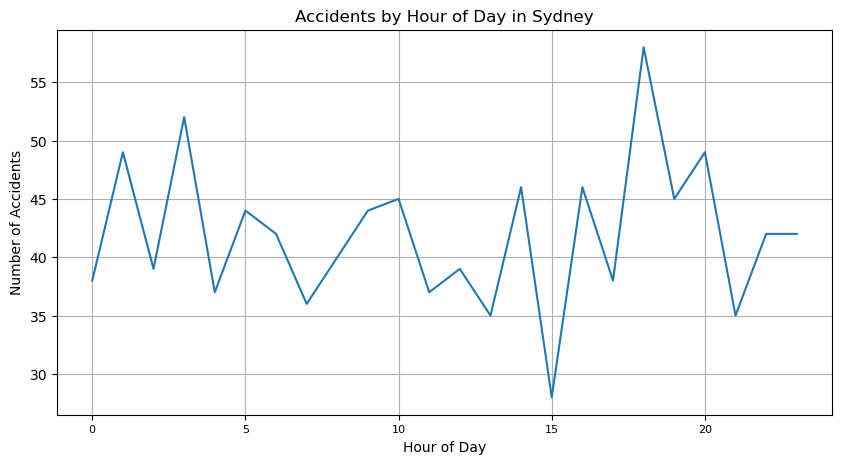

In [26]:
#Filter for Sydney
df_sydney = df[df['Location'] == 'Sydney, Australia']

#Group by Hour_of_day and count accidents
hourly_trends_sydney = df_sydney.groupby('Hour_of_day').size()

#Plotting
hourly_trends_sydney.plot(kind='line', figsize=(10,5))

#Formatting the plot
plt.title('Accidents by Hour of Day in Sydney')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(fontsize=8)
plt.grid(True)
plt.show()

txt

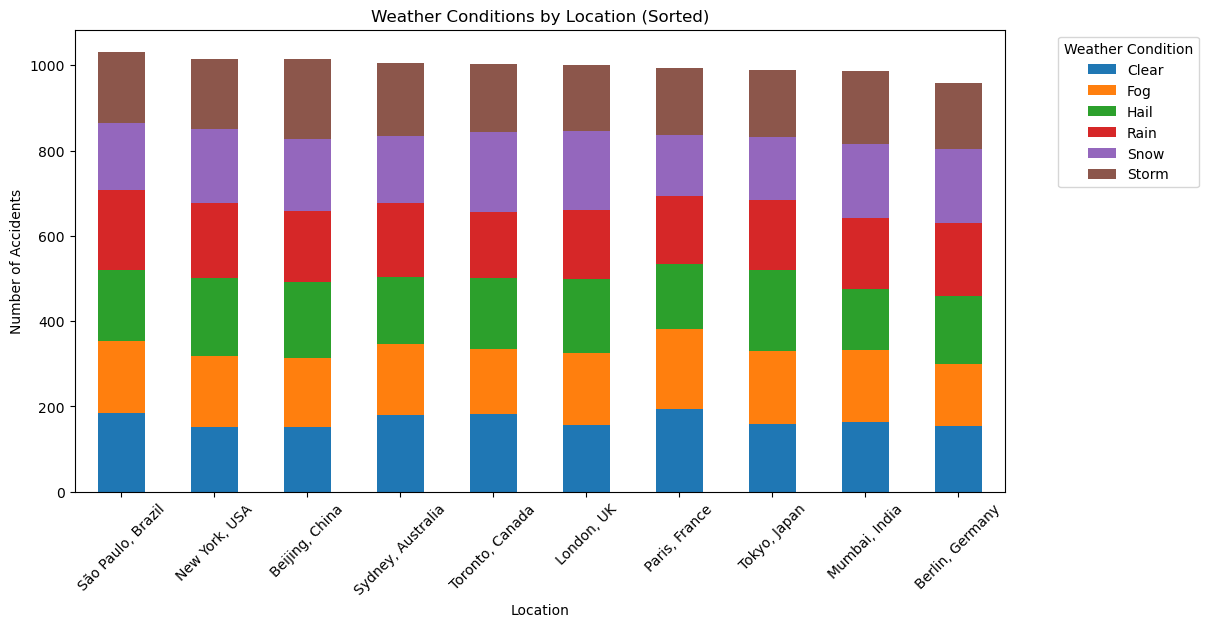

In [28]:
wc_by_city = df.groupby('Location')['Weather Condition'].value_counts().unstack()

#Sorting by total number of accidents per location
wc_by_city = wc_by_city.loc[wc_by_city.sum(axis=1).sort_values(ascending=False).index]

#Plotting
wc_by_city.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Weather Conditions by Location (Sorted)')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Weather conditions and cause of accidents

In this section we will focus on understanding the weather conditions and other factors which have contributed towards the accidents in this dataset occuring. The dataset contains the weather conditions of rain, clear, hail, snow, fog and storm conditions for when accidents have occured. A majority of accidents occur when some weather condition has occured, with only 1674 accidents out of 10,000 occuring in clear conditions meaning that around 85% of accidents occur when the weather has the potential to increase a risk of accidents such as rain or snow. Howevever, it is interesting to note that the highest number of accidents in the dataset occured when the road condition was dry, with 1729 accidents occuring when road conditions were dry, followed by 1702 accidents occuring when road conditions were gravel. These results may imply that weather conditions have more of an impact on accidents than the condition of the road at the time of the accident occuring.

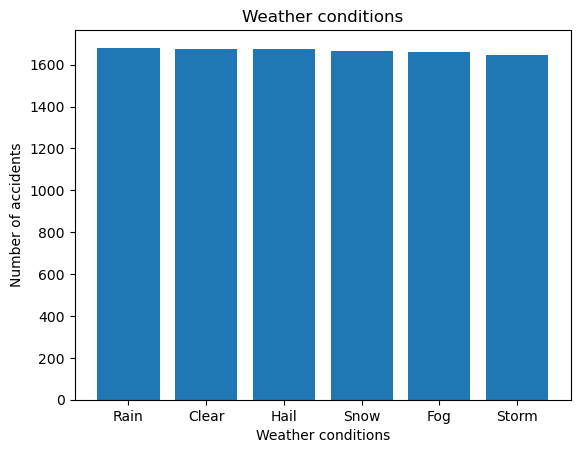

In [31]:
wc = df['Weather Condition'].value_counts()
plt.bar(wc.index, wc.values)
plt.title('Weather conditions')
plt.xlabel('Weather conditions')
plt.ylabel('Number of accidents')
plt.show()

In [32]:
wc

Weather Condition
Rain     1681
Clear    1674
Hail     1673
Snow     1667
Fog      1660
Storm    1645
Name: count, dtype: int64

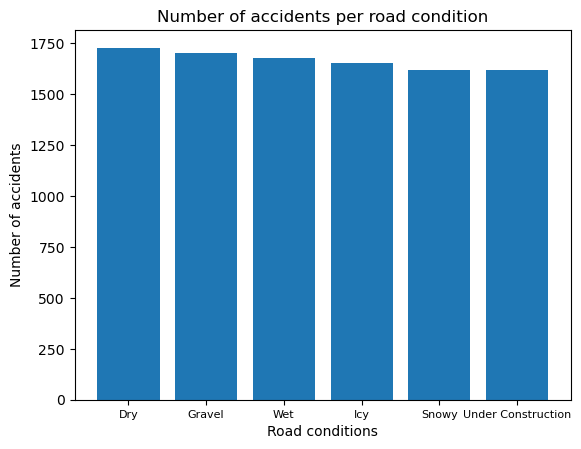

In [33]:
rc = df['Road Condition'].value_counts()
plt.bar(rc.index, rc.values)
plt.title('Number of accidents per road condition')
plt.xlabel('Road conditions')
plt.ylabel('Number of accidents')
plt.xticks(fontsize=8)
plt.show()

In [34]:
rc

Road Condition
Dry                   1729
Gravel                1702
Wet                   1680
Icy                   1653
Snowy                 1618
Under Construction    1618
Name: count, dtype: int64

Below the percentages for the causes of traffic accidents are displayed. The most common cause of traffic accidents in the dataset was drunk driving, with 17.2% of accidents occuring due to this cause. Drunk driving is followed by reckless driving at 16.9%, weather conditions and speeding both equal at 16.6%, mechanical failure at 16.5% and the lowest cause of all traffic accidents in this dataset was distracted driving with 16.3% of accidents being due to this cause.

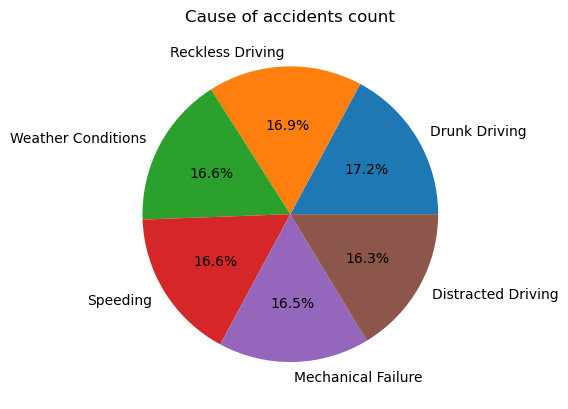

In [37]:
cc = df['Cause'].value_counts()
plt.pie(cc, labels=cc.index, autopct='%1.1f%%')
plt.title('Cause of accidents count')
plt.show()

#### Temporal Patterns Time of accident

In this section, we will analyse the times of the day and year in which traffic accidents have occured. In the first bar chart and line graph, we assess which hours the traffic accidents in this data set occured at. As can be seen, The hours of 12am and 7am saw the most traffic accidents, whilst the hour of 9pm saw the least amount of traffic accidents. We can also see a trend occuring throughout the day, with the number of accidents aligning with peak hour in both the morning and night, whilst also a peak at around midday. Outside of these times, a small decline in the number of accidents can be seen, possibly correlating with reduced traffic in these out of peak times. However, it is also key to note a rise in traffic accidents between midnight and 1am. 

<Axes: xlabel='Hour_of_day', ylabel='count'>

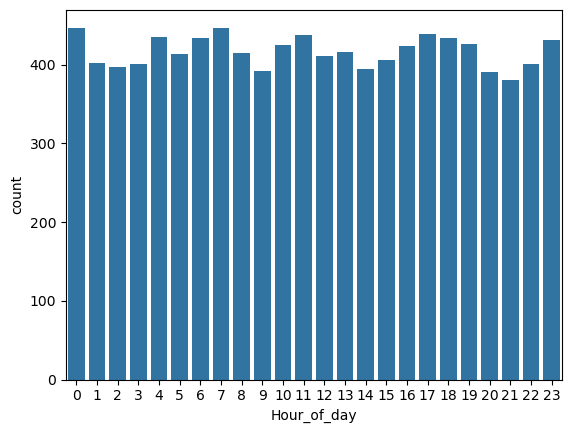

In [40]:
sns.countplot(data=df, x='Hour_of_day')

Text(0.5, 1.0, 'Number of accidents at different times of the day')

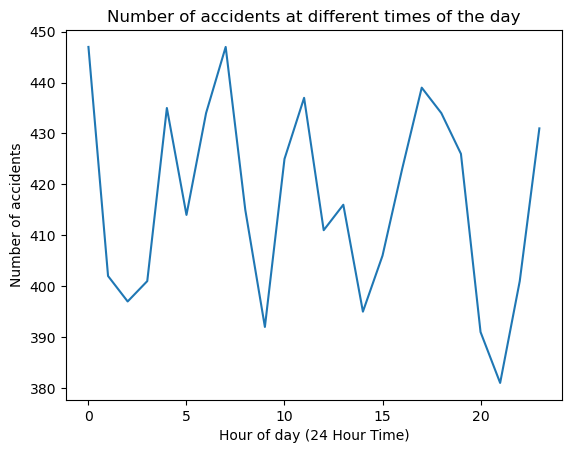

In [41]:
TimeOfDay = sns.lineplot(x=df.Hour_of_day.value_counts().index, y=df.Hour_of_day.value_counts())
TimeOfDay.set_xlabel('Hour of day (24 Hour Time)')
TimeOfDay.set_ylabel('Number of accidents')
TimeOfDay.set_title('Number of accidents at different times of the day')

In the data proseccing stage, each time of the traffic accident was split into different categories for times of the day. These were early AM (12AM-4AM), Early Morning (4AM-8AM), Morning (8AM-12PM), Afternoon (12PM-4PM), Evening (4PM-8PM) and Night (8PM-12AM). As demonstrated in the pie chart below, the time of day with the most accidents is early morning with 17.3% of accidents occuring during this time. This is followed by evening with 17.2% of accidents, Morning with 16.7%, Early AM with 16.5%, Afternoon with 16.3% and finally the time period of the day with the lowest percentage of accidents in this dataset was night with 16% of accidents occuring between 8PM and 12AM.

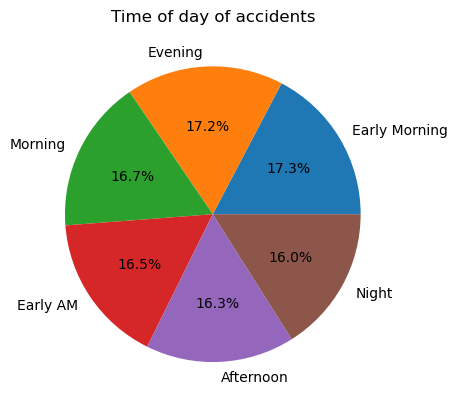

In [42]:
cc = df['Time Category'].value_counts()
plt.pie(tc, labels=tc.index, autopct='%1.1f%%')
plt.title('Time of day of accidents')
plt.show()

We will now analyse which days of the week saw the most traffic accidents within this dataset. As demonstarted below, the day with the most number of total traffic accidents within this dataset was Tuesday with the total of 1451 traffic accidents. Friday was the next highest with 1449 traffic accidents, this was followed by Saturday (1446), Thursday (1439), Sunday (1439), Monday (1395) and last Wednesday with 1381 total traffic accidents

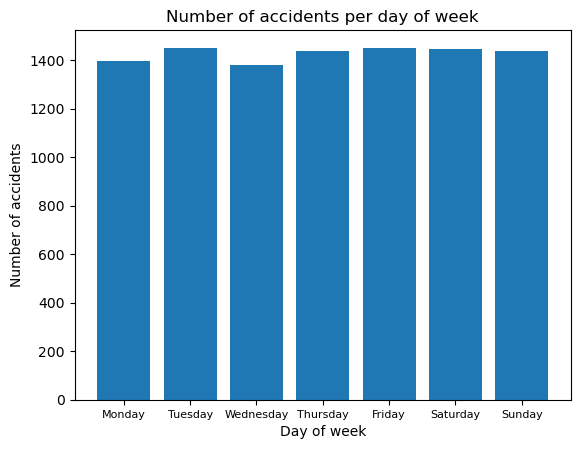

In [43]:
plt.bar(DOWVC.index, DOWVC.values)
plt.xlabel('Day of week')
plt.ylabel('Number of accidents')
plt.title('Number of accidents per day of week')
plt.xticks(fontsize=8)
plt.show()

In [87]:
DOWVC.sort_values(ascending=False)

Tuesday      1451
Friday       1449
Saturday     1446
Thursday     1439
Sunday       1439
Monday       1395
Wednesday    1381
Name: count, dtype: int64

The number of accidents per month consistently floated around 800, with April having the lowest number of accidents and September having the greatest number of accidents. Interestingly, the middle of the year (May-September) saw a generally higher level of accidents as opoosed to those months earlier of later in the year.

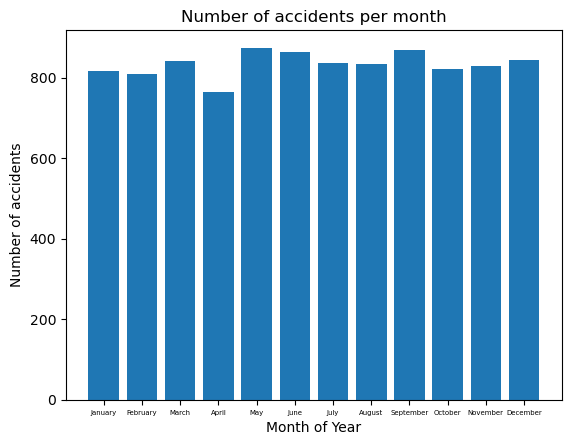

In [44]:
plt.bar(MVC.index, MVC.values)
plt.xlabel('Month of Year')
plt.ylabel('Number of accidents')
plt.title('Number of accidents per month')
plt.xticks(fontsize=5)
plt.show()

Text(0.5, 1.0, 'Hours of day (24 Hour Time) and mean number of Casualties')

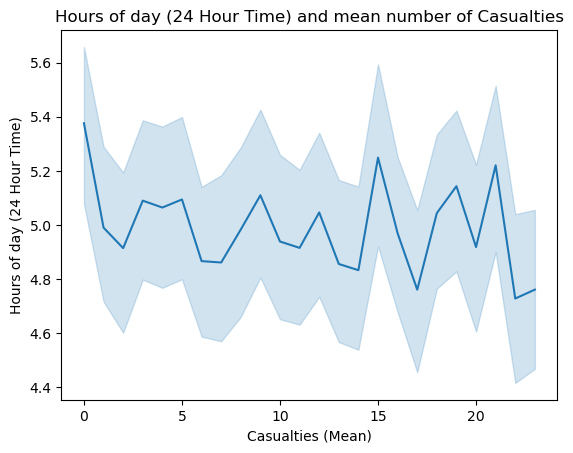

In [45]:
hourscas = sns.lineplot(data=df, x='Hour_of_day', y='Casualties', estimator='mean')
hourscas.set_xlabel('Casualties (Mean)')
hourscas.set_ylabel('Hours of day (24 Hour Time)')
hourscas.set_title('Hours of day (24 Hour Time) and mean number of Casualties')

In [46]:
df['Casualties'].corr(df['Hour_of_day'])

-0.0162755318341194

### Severity of accidents

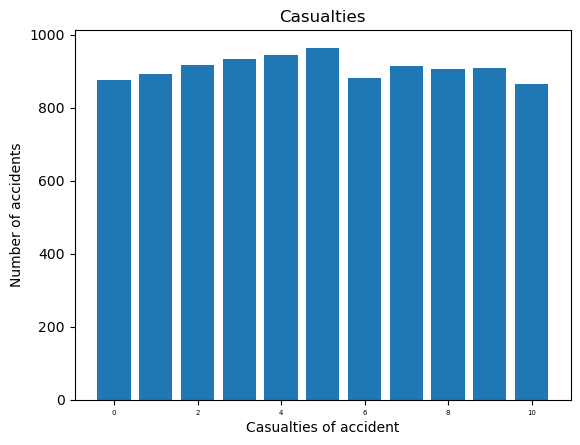

In [48]:
cac = df['Casualties'].value_counts()
plt.bar(cac.index, cac.values)
plt.title('Casualties')
plt.xlabel('Casualties of accident')
plt.ylabel('Number of accidents')
plt.xticks(fontsize=5)
plt.show()

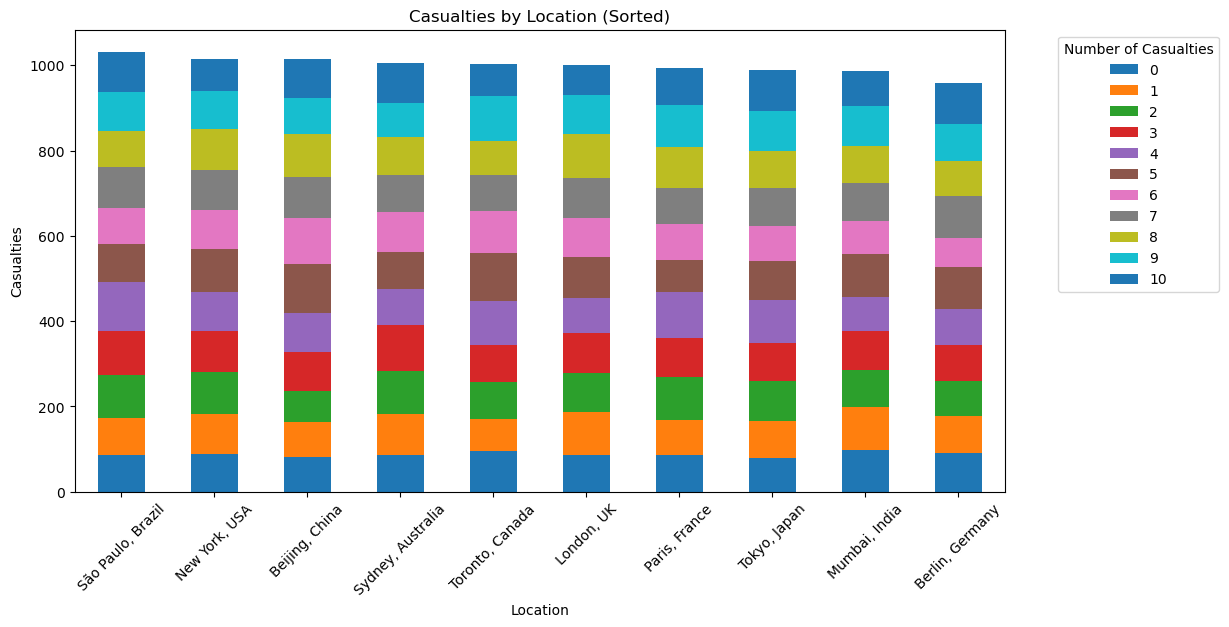

In [97]:
c_by_city = df.groupby('Location')['Casualties'].value_counts().unstack()

#Sorting by total number of accidents per location
c_by_city = c_by_city.loc[c_by_city.sum(axis=1).sort_values(ascending=False).index]

#Plotting
c_by_city.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Casualties by Location (Sorted)')
plt.xlabel('Location')
plt.ylabel('Casualties')
plt.legend(title='Number of Casualties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [99]:
c_by_city

Casualties,0,1,2,3,4,5,6,7,8,9,10
Location,,,,,,,,,,,
"São Paulo, Brazil",87,85,102,103,115,90,84,96,85,90,95
"New York, USA",88,94,99,95,93,100,91,94,96,89,77
"Beijing, China",82,82,73,90,93,114,107,98,101,83,91
"Sydney, Australia",87,95,102,106,86,86,94,87,89,79,95
"Toronto, Canada",96,75,86,88,102,112,100,85,78,105,76
"London, UK",85,101,92,94,83,96,91,95,103,90,70
"Paris, France",85,83,101,91,108,75,84,85,96,98,89
"Tokyo, Japan",78,89,93,88,101,91,84,89,87,94,95
"Mumbai, India",98,100,88,92,79,100,79,87,88,94,82


---